### Crops Data

In [68]:
import pandas as pd
import numpy as np

file_path = "crops2005-2022.csv"
df = pd.read_csv(file_path)

# Filter the data
df_tainan = df[df['地區別'] == '台南市']

print(df_tainan.head())
print(df_tainan.tail())

      年度  地區別 稻作類別     稻作品項   收穫面積     產量
15  2022  台南市   水稻  秈糯稻(長糯)   1268   6961
35  2022  台南市   水稻  軟秈稻(圓糯)    356   1853
55  2022  台南市   水稻  軟秈稻(秈稻)    422   2267
74  2022  台南市   水稻  硬秈稻(在來)     20     80
94  2022  台南市   水稻   稉稻(蓬萊)  12470  77330
        年度  地區別 稻作類別     稻作品項    收穫面積        產量
1818  2005  台南市   水稻  秈糯稻(長糯)      59   302.758
1841  2005  台南市   水稻  稉糯稻(圓糯)       2     8.538
1864  2005  台南市   水稻  軟秈稻(秈稻)  248.71   863.613
1887  2005  台南市   水稻  硬秈稻(在來)      17    66.711
1910  2005  台南市   水稻   稉稻(蓬萊)  323.73  1249.443


#### Observe total 收穫面積 & 產量 for all crops

In [69]:
# Drop the '稻作品項' column
df_tainan = df_tainan.drop(columns=['稻作品項'])

df_tainan['收穫面積'] = df_tainan['收穫面積'].astype(float)
df_tainan['產量'] = df_tainan['產量'].astype(float)

df_tainan = df_tainan.groupby('年度')[['收穫面積', '產量']].sum()
df_tainan

,收穫面積,產量
年度,,
2005,650.44,2491.063
2006,599.55,2437.925
2007,429.94,1975.848
2008,416.39,1834.217
2009,417.64,1634.539
2010,354.98,1292.252
2011,21805.59,121022.880
2012,23257.39,130243.550
2013,24427.83,108896.958


### Weather Data

In [70]:
# brief observation
df = pd.read_csv('./weather/467410-2005.csv')
df.describe

<bound method NDFrame.describe of    觀測時間(month) 測站氣壓(hPa) 海平面氣壓(hPa) 測站最高氣壓(hPa)        測站最高氣壓時間(LST)  \
0      ObsTime   StnPres    SeaPres  StnPresMax       StnPresMaxTime   
1           01    1015.6     1018.8      1024.1  2005/01/21 09:20:00   
2           02    1015.0     1018.2      1021.8  2005/02/11 09:33:00   
3           03    1015.5     1018.7      1028.3  2005/03/05 00:39:00   
4           04    1011.5     1014.6      1019.0  2005/04/04 09:06:00   
5           05    1006.4     1009.5      1010.0  2005/05/17 08:15:00   
6           06    1004.2     1007.3      1011.0  2005/06/30 22:20:00   
7           07    1004.6     1007.6      1012.0  2005/07/14 22:16:00   
8           08    1003.5     1006.6      1012.0  2005/08/18 21:53:00   
9           09    1006.5     1009.5      1015.0  2005/09/18 21:59:00   
10          10    1010.4     1013.5      1016.0  2005/10/24 08:09:00   
11          11    1012.2     1015.3      1017.0  2005/11/23 08:48:00   
12          12    1016.4     1

In [71]:
years = range(2005, 2022)

weather_df = []

for year in years:

    df_year = pd.read_csv(f'./weather/467410-{year}.csv')
    # drop english index row (first row)
    df_year.drop(df_year.index[0], inplace=True)

    # change data types (originally all Objects)
    df_year['降水量(mm)'] = df_year['降水量(mm)'].replace('T', np.nan)
    df_year['降水量(mm)'] = df_year['降水量(mm)'].astype(float)
    df_year['降水日數(day)'] = df_year['降水日數(day)'].astype(float)
    df_year['降水時數(hour)'] = df_year['降水時數(hour)'].astype(float)
    df_year['氣溫(℃)'] = df_year['氣溫(℃)'].astype(float)
    df_year['海平面氣壓(hPa)'] = df_year['海平面氣壓(hPa)'].astype(float)
    df_year['相對溼度(%)'] = df_year['相對溼度(%)'].astype(float)
    df_year['日照時數(hour)'] = df_year['日照時數(hour)'].astype(float)
    df_year['全天空日射量(MJ/㎡)'] = df_year['全天空日射量(MJ/㎡)'].astype(float)
    df_year['總雲量(0~10)'] = df_year['總雲量(0~10)'].astype(float)
    df_year['月最高紫外線指數'] = df_year['月最高紫外線指數'].astype(float)
    df_year['平均日最高紫外線指數'] = df_year['平均日最高紫外線指數'].astype(float)

    # sum up / avr data for each year
    annual_rainging_hours = df_year['降水時數(hour)'].sum()
    annual_raining_days = df_year['降水日數(day)'].sum()
    annual_rainfall = df_year['降水量(mm)'].sum()
    annual_sunshine = df_year['日照時數(hour)'].sum()
    annual_sky_radiation = df_year['全天空日射量(MJ/㎡)'].sum()
    avr_day_max_UV = df_year['平均日最高紫外線指數'].mean()
    avr_monthly_max_UV = df_year['月最高紫外線指數'].mean()
    avr_cloud = df_year['總雲量(0~10)'].mean()
    avr_temp = df_year['氣溫(℃)'].mean()
    avr_pressure = df_year['海平面氣壓(hPa)'].mean()
    avr_humidity = df_year['相對溼度(%)'].mean()
    

    df_year_proc = pd.DataFrame({'年度': [year], 
                                '年度降水量': [annual_rainfall], 
                                '年度降水日數': [annual_raining_days],
                                '年度降水時數': [annual_rainging_hours],
                                '平均氣溫': [avr_temp], 
                                '平均海平面氣壓': [avr_pressure],
                                '平均相對溼度': [avr_humidity],
                                '年度日照時數': [annual_sunshine],
                                '年度天空日射量': [annual_sky_radiation],
                                '年度平均雲量': [avr_cloud],
                                '平均日最高紫外線指數': [avr_day_max_UV],
                                '平均當月最高紫外線指數': [avr_monthly_max_UV]
                                })

    weather_df.append(df_year_proc)

df_weather = pd.concat(weather_df, ignore_index=True)
df_weather

,年度,年度降水量,年度降水日數,年度降水時數,平均氣溫,平均海平面氣壓,平均相對溼度,年度日照時數,年度天空日射量,年度平均雲量,平均日最高紫外線指數,平均當月最高紫外線指數
0,2005,3148.5,97.0,566.7,24.566667,1013.266667,75.166667,2022.7,5157.21,5.266667,6.916667,10.000000
1,2006,1867.2,86.0,384.0,24.983333,1012.600000,80.416667,2041.3,4600.47,5.533333,8.000000,10.916667
2,2007,2207.3,96.0,474.7,24.941667,1012.516667,75.583333,2141.2,5047.29,5.183333,6.500000,9.083333
3,2008,1950.0,88.0,439.6,24.516667,1012.850000,73.250000,2093.5,5234.89,5.425000,6.250000,8.583333
4,2009,1366.6,57.0,237.3,24.833333,1012.266667,73.083333,2311.3,5404.19,4.950000,6.416667,8.666667
5,2010,1779.2,84.0,418.5,24.633333,1013.166667,71.166667,2127.6,5380.33,5.200000,5.916667,8.083333
6,2011,1218.8,72.0,331.7,23.991667,1013.258333,72.416667,1973.2,5966.93,5.675000,6.000000,8.416667
7,2012,2425.7,107.0,409.1,24.375000,1011.908333,76.250000,2028.5,6190.88,5.775000,6.666667,9.500000
8,2013,1688.5,77.0,276.4,24.541667,1012.741667,73.750000,2071.6,6368.97,5.383333,6.333333,8.666667
9,2014,1268.1,94.0,257.7,24.633333,1013.100000,74.416667,2273.5,6415.81,4.941667,6.750000,8.833333


In [72]:
df_combined = df_weather.merge(df_tainan, on='年度')
df_combined

,年度,年度降水量,年度降水日數,年度降水時數,平均氣溫,平均海平面氣壓,平均相對溼度,年度日照時數,年度天空日射量,年度平均雲量,平均日最高紫外線指數,平均當月最高紫外線指數,收穫面積,產量
0,2005,3148.5,97.0,566.7,24.566667,1013.266667,75.166667,2022.7,5157.21,5.266667,6.916667,10.000000,650.44,2491.063
1,2006,1867.2,86.0,384.0,24.983333,1012.600000,80.416667,2041.3,4600.47,5.533333,8.000000,10.916667,599.55,2437.925
2,2007,2207.3,96.0,474.7,24.941667,1012.516667,75.583333,2141.2,5047.29,5.183333,6.500000,9.083333,429.94,1975.848
3,2008,1950.0,88.0,439.6,24.516667,1012.850000,73.250000,2093.5,5234.89,5.425000,6.250000,8.583333,416.39,1834.217
4,2009,1366.6,57.0,237.3,24.833333,1012.266667,73.083333,2311.3,5404.19,4.950000,6.416667,8.666667,417.64,1634.539
5,2010,1779.2,84.0,418.5,24.633333,1013.166667,71.166667,2127.6,5380.33,5.200000,5.916667,8.083333,354.98,1292.252
6,2011,1218.8,72.0,331.7,23.991667,1013.258333,72.416667,1973.2,5966.93,5.675000,6.000000,8.416667,21805.59,121022.880
7,2012,2425.7,107.0,409.1,24.375000,1011.908333,76.250000,2028.5,6190.88,5.775000,6.666667,9.500000,23257.39,130243.550
8,2013,1688.5,77.0,276.4,24.541667,1012.741667,73.750000,2071.6,6368.97,5.383333,6.333333,8.666667,24427.83,108896.958
9,2014,1268.1,94.0,257.7,24.633333,1013.100000,74.416667,2273.5,6415.81,4.941667,6.750000,8.833333,24470.17,135489.295


#### Normalize Data

In [73]:
# Normalize the data, because data is not normally distributed
from sklearn.preprocessing import MinMaxScaler
df_combined = df_combined.drop(columns=['年度'])
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
df_combined_scaled = scaler.fit_transform(df_combined)

# Convert the scaled data back to a DataFrame
df_combined = pd.DataFrame(df_combined_scaled, columns=df_combined.columns)

       年度降水量  年度降水日數    年度降水時數      平均氣溫  平均海平面氣壓    平均相對溼度    年度日照時數  \
0   1.000000    0.80  1.000000  0.448052    0.815  0.432432  0.079493   
1   0.344033    0.58  0.445355  0.772727    0.415  1.000000  0.109362   
2   0.518149    0.78  0.720704  0.740260    0.365  0.477477  0.269793   
3   0.386423    0.62  0.614147  0.409091    0.565  0.225225  0.193191   
4   0.087749    0.00  0.000000  0.655844    0.215  0.207207  0.542958   
5   0.298981    0.54  0.550091  0.500000    0.755  0.000000  0.247952   
6   0.012082    0.30  0.286582  0.000000    0.810  0.135135  0.000000   
7   0.629960    1.00  0.521554  0.298701    0.000  0.549550  0.088807   
8   0.252547    0.40  0.118701  0.428571    0.500  0.279279  0.158022   
9   0.037321    0.74  0.061931  0.500000    0.715  0.351351  0.482255   
10  0.146316    0.26  0.235580  0.772727    1.000  0.486486  0.862855   
11  0.781088    0.98  0.906800  0.701299    0.655  0.657658  0.319094   
12  0.000000    0.30  0.001518  0.824675    0.875  

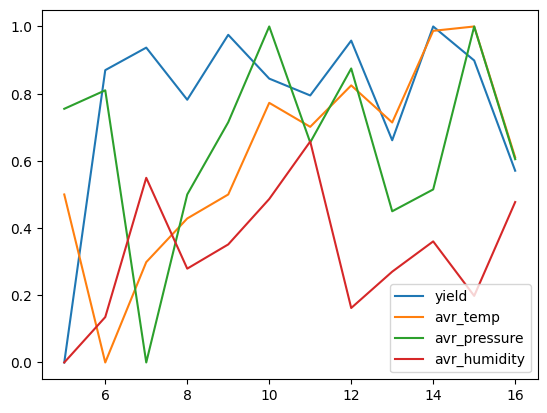

In [74]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Drop the first five rows, which are outliers, the reason needs to be further investigated
print(df_combined)
scaled_crops_yield = df_combined['產量'].head(5)
df_combined = df_combined.iloc[5:]
plt.figure()
plt.plot(df_combined.index, df_combined['產量'], label='yield')
plt.plot(df_combined.index, df_combined['平均氣溫'], label='avr_temp')
plt.plot(df_combined.index, df_combined['平均海平面氣壓'], label='avr_pressure')
plt.legend()
plt.show()

In [75]:
# drop  '產量' and '收穫面積' columns
crops_yield = df_combined['產量']
df_combined = df_combined.drop(['產量', '收穫面積'], axis=1)
# Compute the absolute correlation with '產量'
corr_with_target = df_combined.corrwith(crops_yield).abs()


# Select features with correlation greater than 0.4
# 4 features selected
selected_features = corr_with_target[corr_with_target > 0.23].index

print(selected_features)
corr_with_target

Index(['年度降水時數', '平均相對溼度', '年度天空日射量', '平均當月最高紫外線指數'], dtype='object')


年度降水量          0.167778
年度降水日數         0.088614
年度降水時數         0.388655
平均氣溫           0.145669
平均海平面氣壓        0.058332
平均相對溼度         0.398063
年度日照時數         0.048402
年度天空日射量        0.442835
年度平均雲量         0.201082
平均日最高紫外線指數     0.200354
平均當月最高紫外線指數    0.244006
dtype: float64

#### Random Forest Regressor

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# using selected features to train the model
y = crops_yield
X = df_combined[selected_features]

# changing test size to 0.3 improved the RMSE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=200, random_state=7)

# Fit the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.07320186426779937


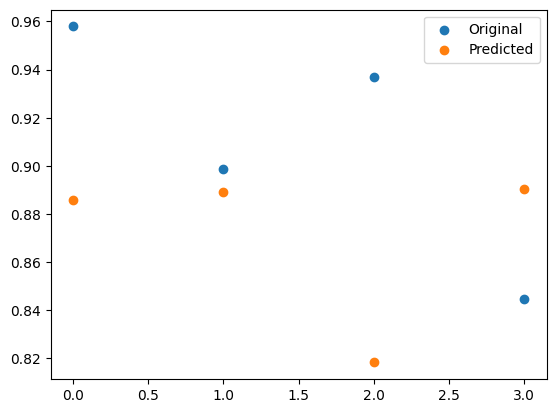

In [77]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)), y_test.values, label='Original')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.show()

#### Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
G_regressor = GradientBoostingRegressor(n_estimators=200, random_state=7)
G_regressor.fit(X_train, y_train)

# Make predictions
y_pred = G_regressor.predict(X_test)

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.08754802144067816


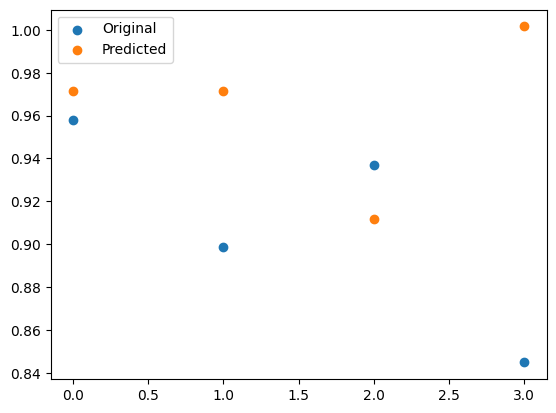

In [79]:
plt.scatter(range(len(y_test)), y_test.values, label='Original')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.show()

#### Support Vector Regression (SVR)

In [80]:
from sklearn.svm import SVR

# Create a SVR model
svr_regressor = SVR(kernel='poly', C=100, gamma=0.1, epsilon=.1)

# Fit the model
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test)
print(y_pred)

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error: {rmse}")

[0.85464972 0.83140645 0.79842537 0.85298328]
Root Mean Squared Error: 0.09286579322379858


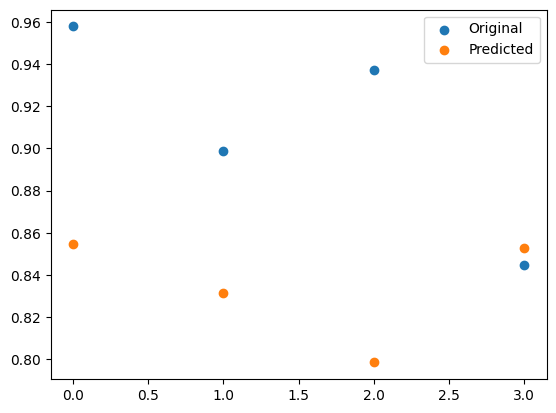

In [81]:
plt.scatter(range(len(y_test)), y_test.values, label='Original')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.show()

#### Test on Unkown data

In [82]:
df_weather.head(5)

,年度,年度降水量,年度降水日數,年度降水時數,平均氣溫,平均海平面氣壓,平均相對溼度,年度日照時數,年度天空日射量,年度平均雲量,平均日最高紫外線指數,平均當月最高紫外線指數
0,2005,3148.5,97.0,566.7,24.566667,1013.266667,75.166667,2022.7,5157.21,5.266667,6.916667,10.000000
1,2006,1867.2,86.0,384.0,24.983333,1012.600000,80.416667,2041.3,4600.47,5.533333,8.000000,10.916667
2,2007,2207.3,96.0,474.7,24.941667,1012.516667,75.583333,2141.2,5047.29,5.183333,6.500000,9.083333
3,2008,1950.0,88.0,439.6,24.516667,1012.850000,73.250000,2093.5,5234.89,5.425000,6.250000,8.583333
4,2009,1366.6,57.0,237.3,24.833333,1012.266667,73.083333,2311.3,5404.19,4.950000,6.416667,8.666667


In [83]:
# actual
file_path = "crops2005-2022.csv"
df_actual = pd.read_csv(file_path)

# Filter the data
df_actual = df_actual[df_actual['地區別'].isin(['台南市', '台南縣'])]
df_actual = df_actual.drop(columns=['稻作品項'])

df_actual['產量'] = df_actual['產量'].astype(float)
df_actual = df_actual.groupby('年度')[['產量']].sum()

prediction = regressor.predict(df_combined[selected_features].head(5))
actual = scaler.fit_transform(df_actual)
actual = actual.flatten()[:len(prediction)]

# Create a DataFrame for comparison
comparison = pd.DataFrame({'Predicted': prediction, 'Actual': actual})

print(comparison)

# Compute the accuracy
accuracy = np.mean(np.abs((actual - prediction) / actual) < 0.1)

# Compute the R^2 score
score = regressor.score(X_test, y_test)
print(f"R^2 Score: {score}")

# Compute the MSE
mse = mean_squared_error(actual, prediction)
print(f"Mean Squared Error: {mse}")

   Predicted    Actual
0   0.308746  0.610698
1   0.794437  0.747024
2   0.818335  0.521555
3   0.812240  0.573129
4   0.902139  0.640171
R^2 Score: -1.8963772651144541
Mean Squared Error: 0.06146034903994717
